In [1]:
#Dependencies
import gmaps
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from config6 import gkey
from pprint import pprint
from config8 import api_key

In [2]:
#Intro and have a response to set the chosen city
print("")
print("                                                 Hello there!                                                          ")
print("")
city = input("                                     Which city would you like to look at?                                      ")
print("")


                                                 Hello there!                                                          

                                     Which city would you like to look at?                                      Istanbul



In [3]:
#Save config information
url = 'http://api.waqi.info/feed/' + city + '/?token='

main_url = url + api_key

response = requests.get(main_url)

data = response.json()['data']

dominentpol = data['dominentpol']

aqi = data['aqi']

In [4]:
#Print json response
data

{'aqi': 24,
 'idx': 4143,
 'attributions': [{'url': 'https://sim.csb.gov.tr/Services/AirQuality',
   'name': 'Turkey National Air Quality Monitoring Network (Ulusal Hava Kalitesi İzleme Ağı)',
   'logo': 'Turkey-TC-cevre-ve-sehircilik-bakanligi.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [41.014722, 28.954722],
  'name': 'Istanbul (Aksaray), Turkey',
  'url': 'https://aqicn.org/city/turkey/marmara/istanbul/aksaray'},
 'dominentpol': 'pm10',
 'iaqi': {'co': {'v': 1.8},
  'dew': {'v': -0.5},
  'h': {'v': 74.5},
  'no2': {'v': 92.6},
  'o3': {'v': 9.9},
  'p': {'v': 1017.5},
  'pm10': {'v': 24},
  'pm25': {'v': 59},
  'so2': {'v': 1.7},
  't': {'v': 3.5},
  'w': {'v': 6.1},
  'wg': {'v': 13.3}},
 'time': {'s': '2021-03-25 10:00:00',
  'tz': '+03:00',
  'v': 1616666400,
  'iso': '2021-03-25T10:00:00+03:00'},
 'forecast': {'daily': {'o3': [{'avg': 36,
     'day': '2021-03-23',
     'max': 39,
     'min': 31},
    {'avg': 33, 'day': '2

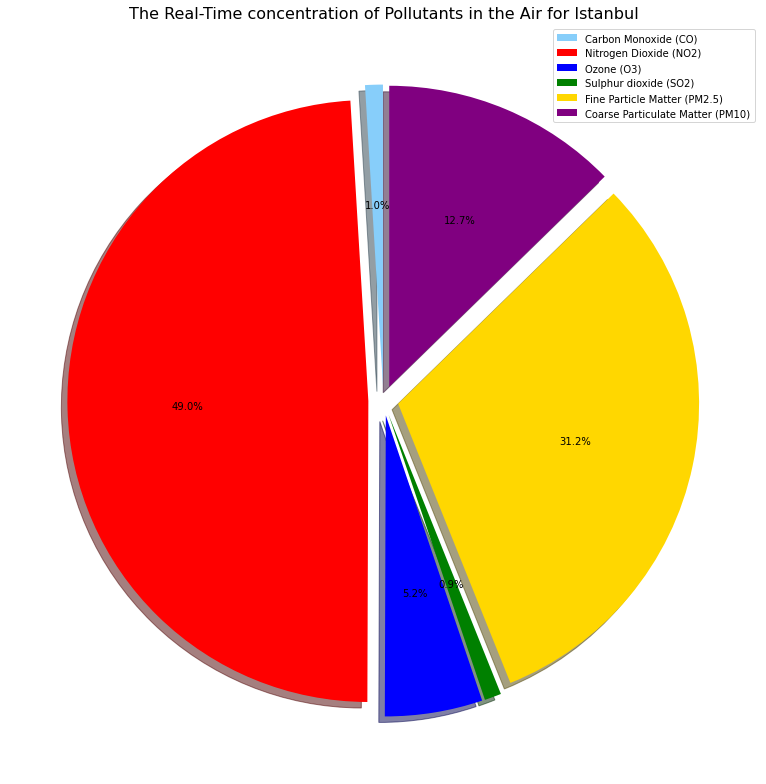

*All values are converted from μg/m3 to AQI levels using the EPA standard
*The Air Quality Index measures the pollutants ['co', 'no2', 'o3', 'so2', 'pm2.5', 'pm10']
*As well as temperature, wind, humidity, and pressure.
*For the sake of comparison, only the pollutant data is collected.


In [5]:
#Store relevant iaqi values in a list
try:
    specific_iaqi = [data['iaqi']['co']['v'],
                     data['iaqi']['no2']['v'],
                     data['iaqi']['o3']['v'],
                     data['iaqi']['so2']['v'],
                     data['iaqi']['pm25']['v'],
                     data['iaqi']['pm10']['v']
]
except:
    print("")
    print("   ***   Hmmm, somethings gone wrong   ***   ")
    print("")
#Store info for Pie Chart
try:
    pollutants = ['co', 'no2', 'o3', 'so2', 'pm2.5', 'pm10',]
    values = specific_iaqi
except:
    print("")
    print("   ***   Ok, well the problem may be here...   ***   ")
    print("")
#Create dataframe
try:
    pollutants_df = pd.DataFrame({
    "Pollutants": pollutants,
    "Values": values
})
except:
    print("")
    print("   ***   Ummm... Houston we have a problem!   ***   ")
    print("")
    
try:
    labels = pollutants_df.index
    colors = ['lightskyblue', 'red', 'blue', 'green', 'gold', 'purple', 'grey']
    explode =(0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
    fig, ax1 = plt.subplots(figsize = (11, 11)) 
    plt.pie(pollutants_df['Values'],
            explode = explode,
            colors = colors,
            startangle = 90,
            autopct = '%.1f%%',
            shadow = True
)
    plt.title(f"The Real-Time concentration of Pollutants in the Air for {city}", fontsize = 16)
    ax1.legend(labels = ['Carbon Monoxide (CO)',
                         'Nitrogen Dioxide (NO2)',
                         'Ozone (O3)',
                         'Sulphur dioxide (SO2)',
                         'Fine Particle Matter (PM2.5)',
                         'Coarse Particulate Matter (PM10)'
],
                loc = 'upper right') 
    plt.tight_layout() 
    plt.show()
    print("*All values are converted from μg/m3 to AQI levels using the EPA standard")
    print(f"*The Air Quality Index measures the pollutants {pollutants}")
    print("*As well as temperature, wind, humidity, and pressure.")
    print("*For the sake of comparison, only the pollutant data is collected.")
except:
    print("")
    print("   ***   Yeah.... you're going to have to restart with a new City  ***   ")

In [6]:
#Extrapolate extra data
print(f"The dominant pollutant in the city of {city} is {dominentpol}.")

#Display information on the dominant pollutant dependent of the result
if dominentpol == "co":
    print("")
    print("                                               CARBON MONOXIDE (CO)                                                 ")
    print("")
    print("             Carbon monoxide is an odourless, colourless gas produced by incomplete oxidation (burning).            ")  
    print("            Although any combustion process will contribute to the concentration of CO in the atmosphere,           ")
    print("                            in cities, motor vehicles are by far the largest human source.                          ")
    print("                      Breathing the high concentrations of CO typical of a polluted environment                     ")
    print("                                leads to reduced oxygen (O2) transport by hemoglobin                                ")
    print("                           and has health effects that include headaches, increased risk of                         ") 
    print("                       chest pain for persons with heart disease, and impaired reaction timing.                     ")
    print("")
    print("   Sources of Carbon Monoxide include:                                                                              ")
    print("         - burning fossil fuels such as natural gas, petrol, coal and oil                                           ")
    print("         - vehicle exhaust                                                                                          ")
    print("         - smoke from wood fires                                                                                    ")
    print("         - gas heaters, BBQs, ovens, and cooktops                                                                   ")
    print("")                            
elif (dominentpol == "no2"):
    print("")
    print("                                              NITROGEN DIOXIDE (NO2)                                                    ")
    print("")
    print("                 Nitrogen Dioxide (NO₂) is an intermediate in the industrial synthesis of nitric acid,              ")
    print("         millions of tons of which are produced each year for use primarily in the production of fertilizers.       ")
    print("            At higher temperatures it is a reddish-brown gas. It can be fatal if inhaled in large quantity.         ")
    print("                      Nitrogen dioxide causes a range of harmful effects on the lungs, including                    ")
    print("      New research warns that NO2 is likely to be a cause of asthma in children. A large new study found evidence   ")
    print("           that people with lung cancer faced greater risk from NO 2, ozone, and other outdoor air pollutants.      ")
    print("                             Environmental effects: NO2 interact with water, oxygen and other                       ")
    print("                                      chemicals in the atmosphere to form acid rain.                                ")
    print("                              Acid rain harms sensitive ecosystems such as lakes and forests.                       ")  
    print("")
    print("   The main sources of NOx (including NO2) are:                                                                     ")
    print("         - natural sources (lightning and microbial processes in soil)                                              ")
    print("         - vehicle exhaust                                                                                          ")
    print("         - fossil fuel-fired power stations                                                                         ")
    print("         - industrial fuel burning equipment e.g. boilers, furnaces.                                                ")  
    print("")
elif (dominentpol == "o3"):
    print("")
    print("                                                    OZONE (O3)                                                      ")
    print("")
    print("      A colorless gas, which is a highly reactive compound in which each molecule consists of three oxygen atoms.   ")
    print("                   Ozone (O3) is a gas. High in the atmosphere, it protects us from UV radiation.                   ")
    print("                                     But at ground level, ozone is a pollutant.                                     ")
    print("                           Ozone can occasionally cause poor air quality during summer.                             ") 
    print("                                       It’s the main pollutant in summer smog.                                      ")
    print("                  Breathing in high levels of ozone can irritate the lining of your throat and lungs.               ")
    print("                    This can make it difficult to breathe. People most sensitive to ozone include:                  ")
    print("                                            - those with lung conditions                                            ")
    print("                                                    - children                                                      ")
    print("                                                 - people over 65.                                                  ")
    print("")
elif (dominentpol == "so2"):
    print("")
    print("                                                CARBON DIOXIDE (SO2)                                                ")
    print("                     A colorless, poisonous gas or liquid, SO 2, that has a strong odor. It is formed               ")
    print("        naturally by volcanic activity, and is a waste gas produced by burning coal and oil and by many industrial  ") 
    print("         processes, such as smelting. It is also a hazardous air pollutant and a major contributor to acid rain.    ") 
    print("                             Sulfur dioxide causes a range of harmful effects on the lungs,                         ")
    print("          as the EPA's most recent review of the Sulfur dioxide causes a range of harmful effects on the lungs,     ")
    print("            as the EPA's most recent review of the science concluded: Wheezing, shortness of breath and chest       ")  
    print("                       tightness and other problems, especially during exercise or physical activity.               ")
    print("")
elif (dominentpol == "pm25"):
    print("")
    print("                                          PARTICULATE MATTER 2.5 (PM2.5)                                            ")
    print("                          PM2.5 refers to atmospheric particulate matter (PM) that have a                           ")
    print("                diameter of less than 2.5 micrometers, which is about 3% the diameter of a human hair.              ")
    print("     Particles in the PM 2.5 size range are able to travel deeply into the respiratory tract, reaching the lungs.   ")
    print("               Exposure to fine particles can cause short-term health effects such as eye, nose, throat             ")
    print("                     and lung irritation, coughing, sneezing, runny nose and shortness of breath.                   ")
    print("")
    print("   Sources of PM2.5:                                                                                                ")
    print("        - natural sources (e.g. bushfire smoke, salt spray)                                                           ")
    print("        - mining                                                                                                      ")
    print("        - industry                                                                                                    ")
    print("        - vehicle exhaust, particularly diesel vehicles                                                               ")
    print("        - solid fuel burning (domestic)                                                                               ")
    print("        - secondary formation due to natural and manmade pollutants.                                                  ")
    print("")
elif (dominentpol == "pm10"):
    print("")
    print("                                           PARTICULATE MATTER 10 (PM10)                                             ")
    print("")
    print("                              PM10 are the particles with a diameter of 10 micrometers                              ")
    print("        and they are also called fine particles.PM 10 is of particular concern because of high concentrations,      ")
    print("               in some areas. It can also damage health with associated effects ranging from respiratory            ")
    print("      irritation to cancer. This indicator considers PM 10 from human-made sources, such as burning wood or coal    ")
    print("                                 for home heating or road motor vehicle emissions.                                  ")
    print("")
    print("   Sources of PM10 include:                                                                                         ")
    print("        - natural sources (e.g. bushfire smoke, salt spray)                                                         ")
    print("        - mining                                                                                                    ")
    print("        - industry                                                                                                  ")
    print("        - vehicle exhaust                                                                                           ")
    print("        - solid fuel burning (domestic)                                                                             ")
    print("")
else:
    print("")
    print("   Very sorry, but the data requested has not been coded yet                                                        ")
    print("")

The dominant pollutant in the city of Istanbul is pm10.

                                           PARTICULATE MATTER 10 (PM10)                                             

                              PM10 are the particles with a diameter of 10 micrometers                              
        and they are also called fine particles.PM 10 is of particular concern because of high concentrations,      
               in some areas. It can also damage health with associated effects ranging from respiratory            
      irritation to cancer. This indicator considers PM 10 from human-made sources, such as burning wood or coal    
                                 for home heating or road motor vehicle emissions.                                  

   Sources of PM10 include:                                                                                         
        - natural sources (e.g. bushfire smoke, salt spray)                                                         
     

In [7]:
#Extrapolate extra data
print(f"                           The Air Quality Index in the city of {city} is {aqi}.                                     ")

if (aqi > 0) and (aqi < 50):
    print("")
    print("                                            1-50 = Good                                                           ")
    print("")
    print("            Air quality is considered satisfactory, and air pollution poses little or no risk                     ")
    print("")
elif (aqi >= 51) and (aqi < 100):
    print("")
    print("                                         51-100 = Moderate                                                        ")
    print("")
    print("             Air quality is acceptable; however, for some pollutants there may be a moderate                      ")
    print("      health concern for a very small number of people who are unusually sensitive to air pollution               ")
    print("                    Active children and adults, and people with respiratory disease,                              ")
    print("                        such as asthma, should limit prolonged outdoor exertion                                   ")
elif (aqi >= 101) and (aqi < 150):
    print("")
    print("                              101-150 = Unhealthy for Sensitive Groups                                            ")
    print("")
    print("   Members of sensitive groups may experience health effects. The general public is not likely to be affected     ")
    print("                    Active children and adults, and people with respiratory disease,                              ")
    print("                        such as asthma, should limit prolonged outdoor exertion                                   ")
    print("")
elif (aqi >= 150) and (aqi < 200):
    print("")
    print("                                         151-200 = Unhealthy                                                      ")
    print("")
    print("                           Everyone may begin to experience health effects                                        ")
    print("                members of sensitive groups may experience more serious health effects                            ")
    print("                    active children and adults, and people with respiratory disease,                              ")
    print("                       such as asthma, should avoid prolonged outdoor exertion;                                   ")
    print("              everyone else, especially children, should limit prolonged outdoor exertion                         ")
    print("")
elif (aqi >= 201) and (aqi < 300):
    print("")
    print("                                        201-300 = Very Unhealthy                                                  ")
    print("")
    print("       Health warnings of emergency conditions. The entire population is more likely to be affected.              ")
    print("                    Active children and adults, and people with respiratory disease,                              ")
    print("                         such as asthma, should avoid all outdoor exertion;                                       ")
    print("                   everyone else, especially children, should limit outdoor exertion.                             ")
    print("")
elif (aqi >= 300):
    print("")
    print("                                           300 +  = Hazadous                                                      ")
    print("")
    print("                   Health alert: everyone may experience more serious health effects                              ")
    print("                               Everyone should avoid all outdoor exertion                                         ")
    print("")                   
else:
    print("")
    print("Data Not Found")
    print("")

                           The Air Quality Index in the city of Istanbul is 24.                                     

                                            1-50 = Good                                                           

            Air quality is considered satisfactory, and air pollution poses little or no risk                     

